
# Project: Investigate the Movie Dataset 
## by Flora Li

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset was generated from The Movie Database API. It contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters

I mainly focus on the following questions:
1. What kinds of numerical properties are associated with movies that have high revenues?
2. Which genres are the most popular in this dataset?

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import Series
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
movie = pd.read_csv("tmdb-movies.csv")

<a id='wrangling'></a>
## 2. Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

<ul>
<li><a href="#General Properties">2.1 General Properties</a></li>
<li><a href="#Missing values">2.2 Missing values</a></li>
<li><a href="#Distribution of variables">2.3 Distribution of variables</a></li>

<li><a href="#Select only numeric variables">2.4 Select only numeric variables</a></li>
<li><a href="#Transform date to month and week">2.5 Transform date to month and week</a></li>
</ul>


<a id='General Properties'></a>
### 2.1 General Properties

In [4]:
movie.shape

(10866, 21)

In [5]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

* **budget:** The budget of the movie in dollars.
* **genres:** A stringified list of dictionaries that list out all the genres associated with the movie.
* **homepage:** The Official Homepage of the move.
* **id:** The ID of the move.
* **imdb_id:** The IMDB ID of the movie.
* **tagline:** The tagline of the movie.
* **original_title:** The original title of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **vote_average:** The average rating of the movie.
* **vote_count:** The number of votes by users, as counted by TMDB.
* **runtime:** The runtime of the movie in minutes.
* **revenue:** The total revenue of the movie in dollars.
* **budget_adj,revenue_adj:** The budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.       

<a id='Missing values'></a>
### 2.2 Missing values

In every analysis, at some point, we will have to deal with the missing values so I find out the amount of missing data in each variable.

In [6]:
missing_df = movie.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['filling_factor'] = (movie.shape[0] 
                                - missing_df['missing_count']) / movie.shape[0] * 100
missing_df.sort_values('filling_factor').reset_index(drop = True)


,column_name,missing_count,filling_factor
0,homepage,7930,27.020063
1,tagline,2824,74.010676
2,keywords,1493,86.259893
3,production_companies,1030,90.520891
4,cast,76,99.300571
5,director,44,99.595067
6,genres,23,99.788331
7,imdb_id,10,99.907970
8,overview,4,99.963188
9,release_year,0,100.000000


The column missing value simply counts the number of null data for each variable. The filling factor represents the percentage of missing value. From the result, it seems most of the data have pretty high filling factor (>99%). Only 4 variables have filling factors less than 91%.


<a id='Distribution of variables'></a>
### 2.3 Distribution of variables

Based on the correlation matrix plot (see part 3: Question 1), I want to investigate the distribution of four variables I am interested in: revenue,popularity,budget and vote_count.

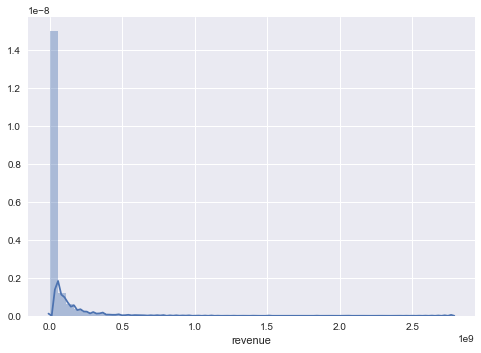

In [24]:
sns.distplot(movie['revenue'])

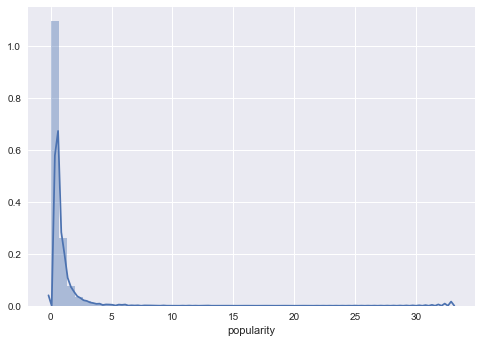

In [25]:
sns.distplot(movie['popularity'])

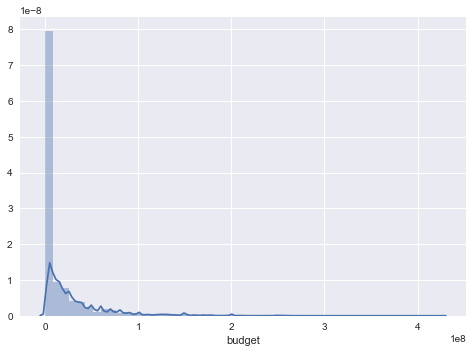

In [26]:
sns.distplot(movie['budget'])

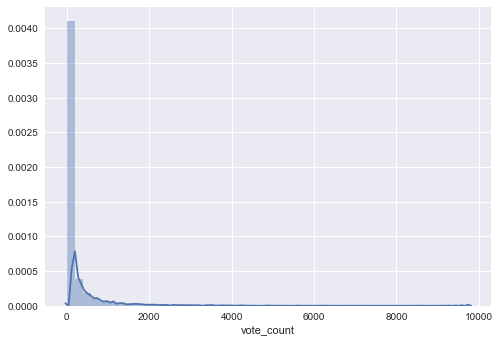

In [27]:
sns.distplot(movie['vote_count'])

From the distribution plots above, we can find out all of these four variables have similar distributions. They all have long-tailed distributions.

<a id='Select only numeric variables'></a>
### 2.4 Select only numeric variables

In [7]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_data = movie.select_dtypes(include=numerics)
num_data.drop('release_year', axis=1, inplace=True)
num_data.drop('id', axis=1, inplace=True)
# test = movie.iloc[:,9:21]# : row , 9 to 20 column
num_data.head(3)

,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,124,5562,6.5,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,120,6185,7.1,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,119,2480,6.3,1.012000e+08,2.716190e+08


<a id='Transform date to month and week'></a>
### 2.5 Transform date to month and week

In [8]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

def get_month(x):
    try:
        return month_order[int(str(x).split('/')[1]) - 1]
    except:
        return np.nan

def get_day(x):
    try:
        year, month, day = (int(i) for i in x.split('/'))    
        answer = datetime.date(year, month, day).weekday()
        return day_order[answer]
    except:
        return np.nan

movie['day'] = movie['release_date'].apply(get_day)
movie['month'] = movie['release_date'].apply(get_month)

<a id='eda'></a>
## 3. Exploratory Data Analysis

### Question 1: What kinds of numerical properties are associated with movies that have high revenues?

#### Correlation Matrix

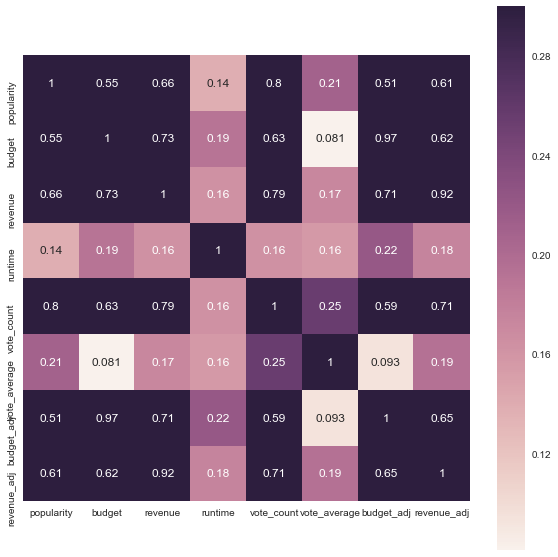

In [9]:
sns.set(font_scale=1)
corr = num_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(10,10))
    ax = sns.heatmap(corr, vmax=.3, square=True, annot=True)


#### Observations:

1. **The revenue have high correlation with popularity,budget and vote_count.** Since movies with higher budget would afford more famous directors and casts, more audiences will watch these movies.      According to the movie database API website, the popularity is caculated based on the  following data: number of votes for the day, number of views for the day, number of users who marked it as a "favourite" for the day, number of users who added it to their "watchlist" for the day, release date, number of total votes, previous days score.

2. The duration of a movie is independent of its success. It's interesting to find out that there are only 0.16 correlation between revenue and runtime.

3. The rating of movie is independent of its sucess. There are only 0.17 correlation between 'revenue' and 'vote_average'.


Let's take a closer look about the correlation. In the following plots, we can see the pearson correlation and related p-value. 
#### Revenue vs Popularity
There are significant correlation between revenue and popularity.

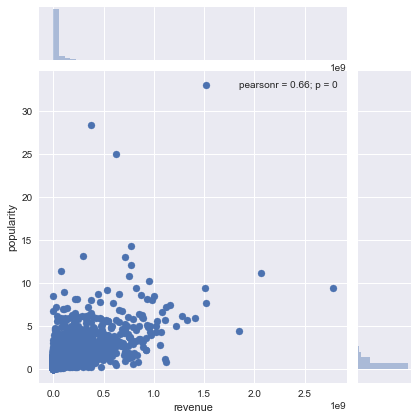

In [10]:
sns.jointplot(x='revenue', y='popularity', data=num_data)

#### Revenue vs Budget
There are significant correlation between revenue and budget.

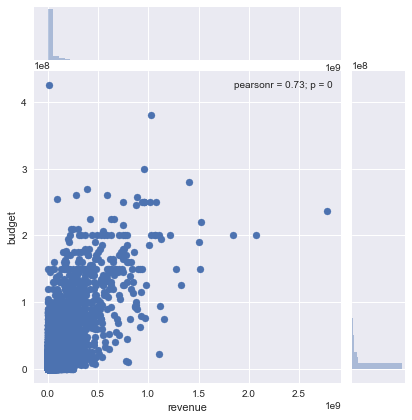

In [11]:
sns.jointplot(x='revenue', y='budget', data=num_data)

#### Revenue vs Vote_count
There are significant correlation between revenue and vote_count.

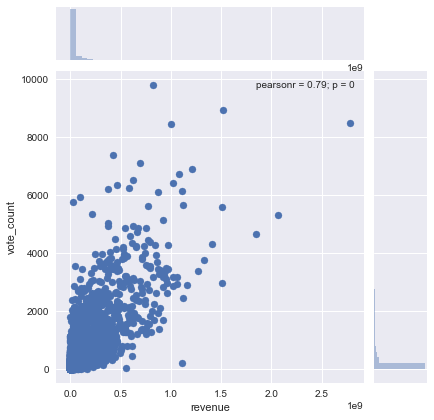

In [12]:
sns.jointplot(x='revenue', y='vote_count', data=num_data)

### Question 2: Which genres have the highest frequency in this dataset?

In [13]:
#expand the genres column to rows since the genres of each movie is stored in one cell and separated by '|'
gen = movie['genres'].str.split('|').apply(Series, 1).stack()
gen.index = gen.index.droplevel(-1)
gen.name = 'genres'

In [14]:
gen.value_counts()

Drama              4761
Comedy             3793
Thriller           2908
Action             2385
Romance            1712
Horror             1637
Adventure          1471
Crime              1355
Family             1231
Science Fiction    1230
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: genres, dtype: int64

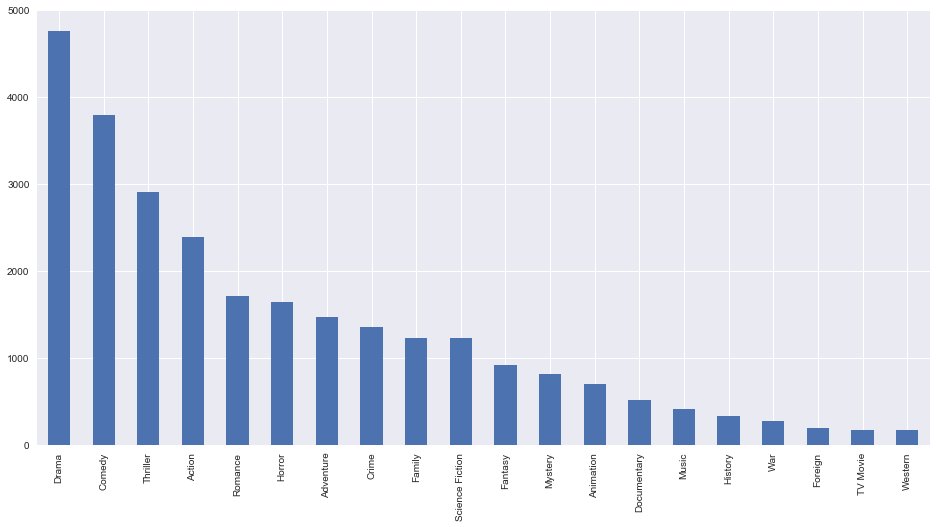

In [15]:
gen.value_counts().plot(kind='bar', figsize=(16, 8));

Observations:

The top 3 most commonly occured genres are drama, comedy, thriller,action and romance.

<a id='conclusions'></a>
## Conclusions and reflections

1. Budget, popularity and vote_count have high correlation with revenue. But it's quite natural. I didn't investigate the impact of the cast and director. If we have the numeric data related to cast and director(such as likes on the social network account), we can get more observations related to revenue.

2. The top 3 most commonly occured genres are drama, comedy, thriller,action and romance.

3. The four main variables I want to investigate are revenue, budget, popularity and vote_count. All of these four variables have long-tailed distribution. If we want to use regression to predict the revenue, we should log transform the revenue data to make it distribute normal. If we want to build a movie recommandation system, we may also need to consider the long-tail effect. As I read from Uri Lerner and Mike Yar's paper, they divide the distribution to head and tail, and then analyze them separately. In future research, I will dig deeper and try to build some models and recommandation systems based on the movie dataset.


In [16]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255

## References:
https://developers.themoviedb.org/3/getting-started/popularity
https://www.kaggle.com/rounakbanik/the-story-of-film/notebook
https://github.com/abbasalali/Investigate-a-Dataset-TMDB-Movies/blob/master/Investigate_a_Dataset.ipynb
https://github.com/sgrihon/TMDB-movies/blob/master/investigate-a-dataset-tmdb-movies.ipynb
https://github.com/leogovan/investigate-a-dataset/blob/master/investigate-a-dataset-tidyup-version.ipynb